In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#Complete Data Preprocessing

<AxesSubplot:>

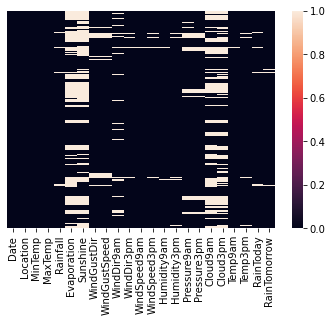

In [3]:
missing_values = ["N/A","na",np.nan]
dataset = pd.read_csv("weatherAUS.csv", na_values = missing_values)
sns.heatmap(dataset.isnull(),yticklabels=False)

In [4]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
dataset.iloc[:,7] = dataset.iloc[:, 7]+ "-WindGustDir"
dataset.iloc[:,9] = dataset.iloc[:, 9]+ "-WindDir9am"
dataset.iloc[:,10] = dataset.iloc[:, 10]+ "-WindDir3pm"

dataset.iloc[:, 2:7]=dataset.iloc[:, 2:7].fillna(0)
dataset.iloc[:, 8]=dataset.iloc[:, 8].fillna(0)
dataset.iloc[:, 11:21]=dataset.iloc[:, 11:21].fillna(0)

dataset.iloc[:, 7] = dataset.iloc[:, 7].fillna(method='ffill')
dataset.iloc[:, 9:11] = dataset.iloc[:, 9:11].fillna(method='ffill')

dataset=dataset.dropna(axis="index",subset=['RainToday','RainTomorrow'])
dataset.iloc[:, -2].replace(('Yes', 'No'),(1,0), inplace=True)
dataset.iloc[:, -1].replace(('Yes', 'No'),(1,0), inplace=True)

dataset


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W-WindGustDir,44.0,W-WindDir9am,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW-WindGustDir,44.0,NNW-WindDir9am,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW-WindGustDir,46.0,W-WindDir9am,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE-WindGustDir,24.0,SE-WindDir9am,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W-WindGustDir,41.0,ENE-WindDir9am,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,0.0,0.0,E-WindGustDir,31.0,ESE-WindDir9am,...,59.0,27.0,1024.7,1021.2,0.0,0.0,9.4,20.9,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,0.0,0.0,E-WindGustDir,31.0,SE-WindDir9am,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,0.0,0.0,NNW-WindGustDir,22.0,SE-WindDir9am,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,0.0,0.0,N-WindGustDir,37.0,SE-WindDir9am,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,0,0


In [6]:
tdataset = dataset
tdataset = tdataset.drop(['RainToday','RainTomorrow','WindGustDir','WindDir9am','WindDir3pm','Location'],axis=1)
windgustdir_dummies = pd.get_dummies(dataset.WindGustDir)
winddir9am_dummies = pd.get_dummies(dataset.WindDir9am)
winddir3pm_dummies = pd.get_dummies(dataset.WindDir3pm)
location_dummies = pd.get_dummies(dataset.Location)
#windgustdir_dummies
#winddir9am_dummies
#winddir3pm_dummies
tdataset = pd.concat([tdataset,windgustdir_dummies],axis='columns')
tdataset = pd.concat([tdataset,winddir9am_dummies],axis='columns')
tdataset = pd.concat([tdataset,winddir3pm_dummies],axis='columns')
tdataset = pd.concat([tdataset,location_dummies],axis='columns')
tdataset = pd.concat([tdataset,dataset.RainToday,dataset.RainTomorrow],axis='columns')
dataset = tdataset

In [7]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

k= np.max(X)
for i in range(1, len(X.columns)+1):
    v = X.iloc[:, i-1]
    #print(w)
    v = v/k[i-1]
    X.iloc[:, i-1] = v
print(X)

         MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.395280  0.476091  0.001617          0.0       0.0       0.325926   
1       0.218289  0.521830  0.000000          0.0       0.0       0.325926   
2       0.380531  0.534304  0.000000          0.0       0.0       0.340741   
3       0.271386  0.582121  0.000000          0.0       0.0       0.177778   
4       0.516224  0.671518  0.002695          0.0       0.0       0.303704   
...          ...       ...       ...          ...       ...            ...   
145454  0.103245  0.453222  0.000000          0.0       0.0       0.229630   
145455  0.082596  0.486486  0.000000          0.0       0.0       0.229630   
145456  0.106195  0.525988  0.000000          0.0       0.0       0.162963   
145457  0.159292  0.559252  0.000000          0.0       0.0       0.274074   
145458  0.230088  0.561331  0.000000          0.0       0.0       0.207407   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  .

In [8]:

X_train = X.values
Y_train = y.values

X_train = X_train.T
Y_train = Y_train.reshape(1,X_train.shape[1])

In [9]:
print(X_train.shape)
print(Y_train.shape)

(114, 140787)
(1, 140787)


In [10]:
X_train

array([[0.39528024, 0.21828909, 0.38053097, ..., 0.10619469, 0.15929204,
        0.2300885 ],
       [0.47609148, 0.52182952, 0.53430353, ..., 0.52598753, 0.55925156,
        0.56133056],
       [0.00161725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
def sigmoid(x):
    return 1/(1 + scipy.special.expit(-x))

In [12]:
def logisticRegression(X1 ,Y1 , alpha, iters):
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    b = np.zeros((1,m))
    w = np.zeros((n,1))
    costs = []

    for i in range(iters):
        Z = np.dot(w.T,X1) + b
        A = sigmoid(Z)
        
        c = (-1/m)*(np.sum(Y1*np.log(A) + (1-Y1)*np.log(1-A)))
        costs.append(c)
        
        dw = (1/m)*np.dot(A-Y1, X1.T)
        db = (1/m)*(A-Y1)
        
        w = w - alpha*dw.T
        b = b - alpha*db
        
        if(i%(iters/10) == 0):
            print(f"cost after {i} iters:", c)
        
    return w,b,costs


In [15]:
iters = 1000
w,b,costs = logisticRegression(X_train,Y_train,0.01,iters)

cost after 0 iters: 0.944998068742613
cost after 100 iters: 0.7692567871117165
cost after 200 iters: 0.7225972736517046
cost after 300 iters: 0.7063313598758385
cost after 400 iters: 0.6997552589197803
cost after 500 iters: 0.6967971035247916
cost after 600 iters: 0.6953315246973047
cost after 700 iters: 0.6945378292487455
cost after 800 iters: 0.6940741375724251
cost after 900 iters: 0.6937867345418829


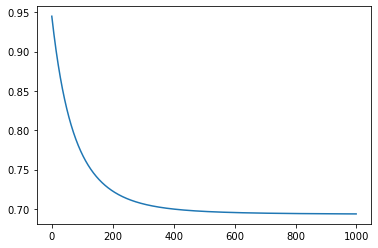

In [16]:
plt.plot(np.arange(iters),costs)
plt.show()